# Desafio Labdata Churn - Kaggle - Início dos trabalhos: 07 - 11 - 2020

---


## 1. Análise dos Dados - Início

---



# Carregamento e Visualização dos Dados

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pprint import pprint

In [245]:
# Função para mostrar missing values
def mostra_missing_value(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = 100*round((df.isnull().sum()/df.isnull().count()).sort_values(ascending = False), 2)
    missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percentual'])
    print(missing_data.head(10))

In [246]:
# Função para plotar o Boxplot
def boxplot_churn(df, column):
    plt.rcdefaults()
    sns.catplot(x = 'churn', y = column, kind = "box", data = df, height = 4, aspect = 1.5)
    
    # add data points to boxplot with stripplot
    sns.stripplot(x = 'churn', y = column, data = df, alpha = 0.3, jitter = 0.2, color = 'k');
    plt.show()

In [247]:
# Carregando o dataframe de Treino e df_teste
df_treino = pd.read_csv('/content/train.csv')
df_teste = pd.read_csv('/content/test.csv')
df_treino.columns = df_treino.columns.str.lower()
df_teste.columns = df_teste.columns.str.lower()
df_treino.head(3)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0


In [248]:
# Dimensão do df_treino
df_treino.shape, df_teste.shape

((5634, 21), (1409, 20))

DataFrame Treino possui 21 colunas e 5634 linhas \
DataFrame Teste possui 20 colunas e 1409 linhas

In [249]:
# NATUREZA DOS DADOS NO DF_TREINO
colunas = df_treino.columns
colunas

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [250]:
# Verificando as tipicidades das informações dentro de cada variável, excluindo a id

for i in colunas:
  if i != 'id':
    print(df_treino[i].value_counts())



Male      2849
Female    2785
Name: gender, dtype: int64
0    4740
1     894
Name: seniorcitizen, dtype: int64
No     2902
Yes    2732
Name: partner, dtype: int64
No     3793
Yes    1623
Name: dependents, dtype: int64
1.0     438
72.0    259
2.0     166
3.0     149
4.0     132
       ... 
33.0     43
39.0     40
36.0     40
44.0     39
0.0       8
Name: tenure, Length: 73, dtype: int64
Yes    5082
No      552
Name: phoneservice, dtype: int64
No                  2692
Yes                 2390
No phone service     552
Name: multiplelines, dtype: int64
Fiber optic    2451
DSL            1959
No             1224
Name: internetservice, dtype: int64
No                     2763
Yes                    1647
No internet service    1224
Name: onlinesecurity, dtype: int64
No                     2488
Yes                    1922
No internet service    1224
Name: onlinebackup, dtype: int64
No                     2480
Yes                    1930
No internet service    1224
Name: deviceprotection, dtype

# TRATANDO AS VARIÁVEIS
 Conhecendo e tratando as **variáveis**




In [251]:
# Verificando missing values expressos nas variáveis:
df_treino.isna().sum()

id                    0
gender                0
seniorcitizen         0
partner               0
dependents          218
tenure              461
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod        99
monthlycharges        0
totalcharges          0
churn                 0
dtype: int64

### As variáveis que possuem Missing Values são:
Serão tratados cada um na sua etapa

dependentes com 218 

tenure com 461

paymentmethod com 99

# copia do dataframe df_treino para df_treino1

###INÍCIO TRATAMENTO VARIÁVEL GENDER (SEXO)

In [252]:
# Variável GENDER
# Vamos transformá-la com labelencoder em binário
# COPIA DO DATAFRAME DE TREINO PARA O TRATAMENTO
df_treino1 = df_treino.copy()
df_treino1['gender'].value_counts()

Male      2849
Female    2785
Name: gender, dtype: int64

In [253]:
# PARA O DF_TESTE
df_teste1 = df_teste.copy()
df_teste1['gender'].value_counts()


Male      706
Female    703
Name: gender, dtype: int64

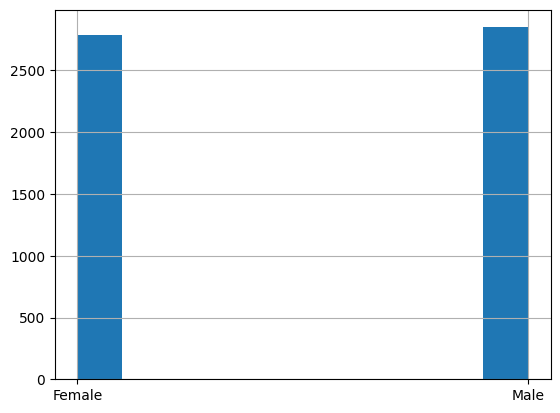

In [254]:
# Dataframe está balanceado.
df_treino1['gender'].hist();

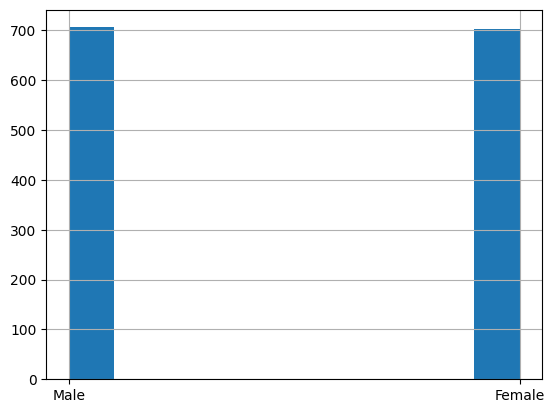

In [255]:
# Dataframe está balanceado.
df_teste1['gender'].hist();

In [256]:
# transformação com LabelEncoder. Criada Coluna gender_le: '0' -> Female e '1' -> Male
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_treino1['gender_le'] = le.fit_transform(df_treino1['gender'])
df_treino1.head()


,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender_le
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [257]:
# PARA DATAFRAME TESTE
# transformação com LabelEncoder. Criada Coluna gender_le: '0' -> Female e '1' -> Male
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_teste1['gender_le'] = le.fit_transform(df_teste1['gender'])
df_teste1.head()


,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender_le
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,1
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0


In [258]:
# Confirmando a transformação label Encoder da gender:
print(df_treino1['gender_le'].value_counts())
print('  ')
print(df_treino['gender'].value_counts())


1    2849
0    2785
Name: gender_le, dtype: int64
  
Male      2849
Female    2785
Name: gender, dtype: int64


In [259]:
# PARA DF TESTE
# Confirmando a transformação label Encoder da gender:
print(df_teste1['gender_le'].value_counts())
print('  ')
print(df_teste['gender'].value_counts())


1    706
0    703
Name: gender_le, dtype: int64
  
Male      706
Female    703
Name: gender, dtype: int64


In [260]:
df_treino1['gender'] = df_treino1['gender_le']
#  df_treino1.drop(columns = 'gender_le', axis = 0)   não funcionou ver depois
df_treino1.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender_le
0,4030,0,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,1,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1
2,6479,0,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,0,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,1,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [261]:
# PARA DF TESTE



In [262]:
#PARA DF TESTE
df_teste1['gender'] = df_teste1['gender_le']
#  df_treino1.drop(columns = 'gender_le', axis = 0)   não funcionou ver depois
df_teste1.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender_le
0,5027,1,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1
1,1733,1,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1
2,5384,1,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,1
3,6554,0,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0
4,364,0,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0


In [263]:
df_treino1['gender'].describe()

count    5634.000000
mean        0.505680
std         0.500012
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

In [264]:
df_teste1['gender'].describe()

count    1409.000000
mean        0.501065
std         0.500176
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

In [265]:
# VER SE NÃO HÁ MISSING VALUES
df_treino['gender'].isna().sum()

0

In [266]:
# DF TESTE
# VER SE NÃO HÁ MISSING VALUES
df_teste1['gender'].isna().sum()

0

## VARIÁVEL SeniorCitizen

In [267]:
# Vejamos a distribuição da SeniorCitizen (IDOSO)
df_treino1['seniorcitizen'].value_counts()

0    4740
1     894
Name: seniorcitizen, dtype: int64

In [268]:
# df teste
# Vejamos a distribuição da SeniorCitizen (IDOSO)
df_teste1['seniorcitizen'].value_counts()

0    1161
1     248
Name: seniorcitizen, dtype: int64

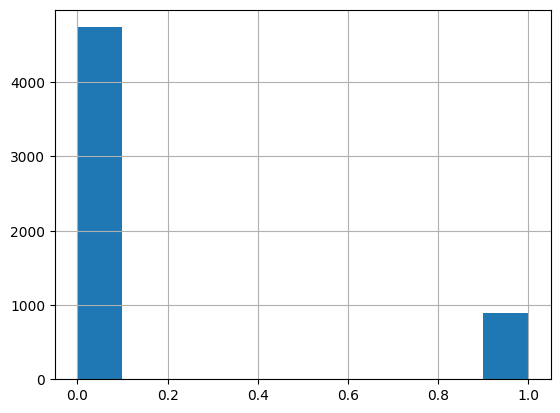

In [269]:
# Está desbalanceado.
df_treino1['seniorcitizen'].hist();

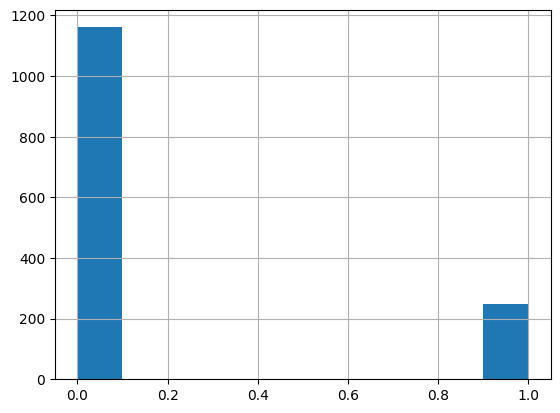

In [270]:
# df teste
# Está desbalanceado.
df_teste1['seniorcitizen'].hist();

In [271]:
print(f'Percentual de Idosos (SeniorCitizen) = 1: ', 
      (100*((df_treino1['seniorcitizen']==1).sum())/((df_treino1['seniorcitizen']).count())).round(2), ' %')

Percentual de Idosos (SeniorCitizen) = 1:  15.87  %


In [272]:
# Parece que a variável 0 ou 1 é float64. Vamos transformá-la em categórica
df_treino1['seniorcitizen'].describe()

count    5634.000000
mean        0.158679
std         0.365409
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: seniorcitizen, dtype: float64

In [273]:
# df teste
# Parece que a variável 0 ou 1 é float64. Vamos transformá-la em categórica
df_teste1['seniorcitizen'].describe()

count    1409.000000
mean        0.176011
std         0.380965
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: seniorcitizen, dtype: float64

In [31]:
# Em princípio, consegui transformar em categórica 0 e 1 (não idoso e Idoso)
df_treino1['seniorcitizen'] = df_treino1['seniorcitizen'].astype('category')
df_treino1['seniorcitizen'].describe()

count     5634
unique       2
top          0
freq      4740
Name: seniorcitizen, dtype: int64

In [274]:
# df teste
# Em princípio, consegui transformar em categórica 0 e 1 (não idoso e Idoso)
df_teste1['seniorcitizen'] = df_teste1['seniorcitizen'].astype('category')
df_teste1['seniorcitizen'].describe()

count     1409
unique       2
top          0
freq      1161
Name: seniorcitizen, dtype: int64

# Tratamento da Variável 'partner'  (traduzindo: parceiro)

In [275]:
df_treino1.columns

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'gender_le'],
      dtype='object')

In [276]:
# Variável tipo binário
df_treino1['partner'].value_counts()

No     2902
Yes    2732
Name: partner, dtype: int64

In [277]:
# Não tem missing values
df_treino1['partner'].isnull().sum()

0

In [278]:
#df teste
# Não tem missing values
df_teste1['partner'].isnull().sum()

0

In [279]:
# Vamos aplicar o EncoderLabel
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df_treino1['partner_le'] = le.fit_transform(df_treino1['partner'])
df_treino1.head()


,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender_le,partner_le
0,4030,0,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0,0
1,6731,1,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1,1
2,6479,0,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0,1
3,6861,0,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0,0
4,3266,1,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1,1


In [280]:
# df teste
# Vamos aplicar o EncoderLabel
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df_teste1['partner_le'] = le.fit_transform(df_teste1['partner'])
df_teste1.head()


,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender_le,partner_le
0,5027,1,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1,1
1,1733,1,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1,1
2,5384,1,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,1,0
3,6554,0,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0,1
4,364,0,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0,0


In [281]:
df_treino1['partner'] = df_treino1['partner_le']
df_treino1.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender_le,partner_le
0,4030,0,0,0,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0,0
1,6731,1,0,1,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1,1
2,6479,0,0,1,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0,1
3,6861,0,0,0,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0,0
4,3266,1,0,1,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1,1


In [282]:
# df teste
df_teste1['partner'] = df_teste1['partner_le']
df_teste1.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender_le,partner_le
0,5027,1,0,1,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1,1
1,1733,1,1,1,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1,1
2,5384,1,0,0,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,1,0
3,6554,0,0,1,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0,1
4,364,0,0,0,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0,0


In [283]:
df_treino1.drop(columns = 'gender_le', axis = 1, inplace = True)
df_treino1.drop(columns = 'partner_le', axis = 1, inplace = True)
df_treino1.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,1,0,1,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,0,0,1,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,0,0,0,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,1,0,1,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [284]:
# df teste
df_teste1.drop(columns = 'gender_le', axis = 1, inplace = True)
df_teste1.drop(columns = 'partner_le', axis = 1, inplace = True)
df_teste1.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,1,1,1,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,1,0,0,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,0,0,1,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,0,0,0,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [285]:
# Variável partner balanceada
df_treino1['partner'].value_counts()

0    2902
1    2732
Name: partner, dtype: int64

In [286]:
# df teste
# Variável partner balanceada
df_teste1['partner'].value_counts()

0    739
1    670
Name: partner, dtype: int64

# VARIÁVEL: Dependents  (tradução: dependentes)

In [287]:
# O balanceamento não é dos melhores (30% e 70% aprox)
# É variável categórica binária. Vamos fazer o labelencoder
df_treino1['dependents'].value_counts()

No     3793
Yes    1623
Name: dependents, dtype: int64

In [288]:
# df teste
# O balanceamento não é dos melhores (30% e 70% aprox)
# É variável categórica binária. Vamos fazer o labelencoder
df_teste1['dependents'].value_counts()

No     953
Yes    415
Name: dependents, dtype: int64

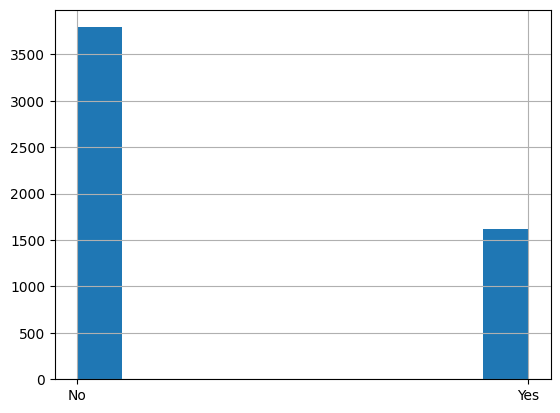

In [289]:
df_treino1['dependents'].hist();

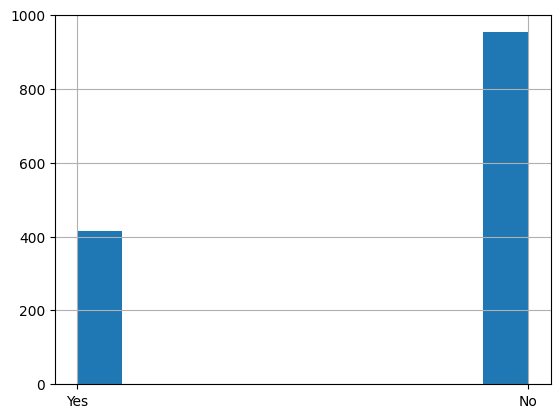

In [290]:
#df teste
df_teste1['dependents'].hist();

### Missing Values: Critério que utilizarei: Normalmente, quando se tem dependentes viajando junto, se preocupa em informar. Então se a omissão da informação veio do homem, é provável que não se preocupou e não preencheu a informação. Vou colocar No para todos os missing values

In [291]:
# Missing Values em dependents
df_treino1['dependents'] = df_treino1['dependents'].fillna('No')

In [292]:
# df teste
# Missing Values em dependents
df_teste1['dependents'] = df_teste1['dependents'].fillna('No')

In [293]:
mostra_missing_value(df_treino1)

                Total  Percentual
tenure            461         8.0
paymentmethod      99         2.0
churn               0         0.0
onlinesecurity      0         0.0
gender              0         0.0
seniorcitizen       0         0.0
partner             0         0.0
dependents          0         0.0
phoneservice        0         0.0
multiplelines       0         0.0


In [294]:
# df teste
mostra_missing_value(df_teste1)

                 Total  Percentual
tenure             118         8.0
paymentmethod       30         2.0
totalcharges         0         0.0
internetservice      0         0.0
gender               0         0.0
seniorcitizen        0         0.0
partner              0         0.0
dependents           0         0.0
phoneservice         0         0.0
multiplelines        0         0.0


In [295]:
df_treino1['dependents'].value_counts()

No     4011
Yes    1623
Name: dependents, dtype: int64

In [296]:
# df teste
df_teste1['dependents'].value_counts()

No     994
Yes    415
Name: dependents, dtype: int64

In [297]:
# Transformando em categorias label encoder a variável dependents (NO = 0 e SIM = 1)
le = LabelEncoder()
df_treino1['dependents_le'] = le.fit_transform(df_treino1['dependents'])
df_treino1.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,dependents_le
0,4030,0,0,0,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,1,0,1,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1
2,6479,0,0,1,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,0,0,0,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,1,0,1,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [298]:
# df teste
# Transformando em categorias label encoder a variável dependents (NO = 0 e SIM = 1)
le = LabelEncoder()
df_teste1['dependents_le'] = le.fit_transform(df_teste1['dependents'])
df_teste1.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,dependents_le
0,5027,1,0,1,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1
1,1733,1,1,1,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1
2,5384,1,0,0,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,0
3,6554,0,0,1,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,1
4,364,0,0,0,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0


In [299]:
df_treino1['dependents'] = df_treino1['dependents_le']
df_treino1.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,dependents_le
0,4030,0,0,0,0,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,1,0,1,1,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1
2,6479,0,0,1,0,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,0,0,0,0,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,1,0,1,1,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [300]:
# df teste
df_teste1['dependents'] = df_teste1['dependents_le']
df_teste1.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,dependents_le
0,5027,1,0,1,1,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1
1,1733,1,1,1,1,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1
2,5384,1,0,0,0,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,0
3,6554,0,0,1,1,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,1
4,364,0,0,0,0,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0


In [301]:
df_treino1.drop(columns = 'dependents_le', axis = 1, inplace = True)
df_treino1.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,1,0,1,1,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,0,0,1,0,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,0,0,0,0,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,1,0,1,1,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [302]:
# df teste
df_teste1.drop(columns = 'dependents_le', axis = 1, inplace = True)
df_teste1.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,1,1,1,1,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,1,0,0,0,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,0,0,1,1,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,0,0,0,0,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


# VARIÁVEL: TENURE   (Tenho que é o tempo de permanência do cliente)
> Bloco com recuo



In [303]:
df_treino['tenure'].value_counts()

1.0     438
72.0    259
2.0     166
3.0     149
4.0     132
       ... 
33.0     43
39.0     40
36.0     40
44.0     39
0.0       8
Name: tenure, Length: 73, dtype: int64

In [304]:
# df teste
df_teste['tenure'].value_counts()

1.0     122
72.0     68
2.0      50
3.0      35
4.0      32
       ... 
43.0      7
44.0      6
28.0      5
38.0      5
0.0       3
Name: tenure, Length: 73, dtype: int64

In [305]:
df_treino1['tenure'].describe()

count    5173.000000
mean       32.332882
std        24.463607
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [306]:
#df teste
df_teste1['tenure'].describe()

count    1291.000000
mean       32.460883
std        24.843710
min         0.000000
25%         9.000000
50%        29.000000
75%        57.000000
max        72.000000
Name: tenure, dtype: float64

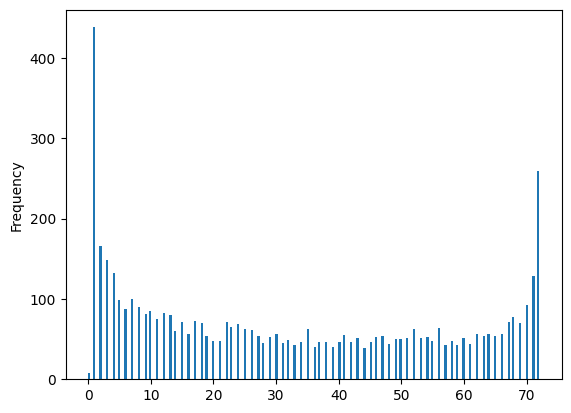

In [307]:
df_treino1['tenure'].plot(kind = 'hist', bins = 200) # O que são bins?

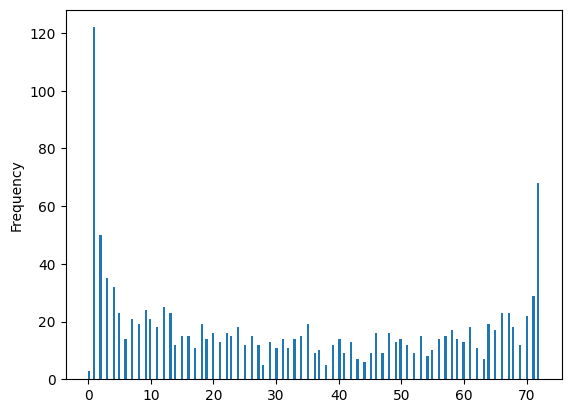

In [308]:
#df teste
df_teste1['tenure'].plot(kind = 'hist', bins = 200) # O que são bins?

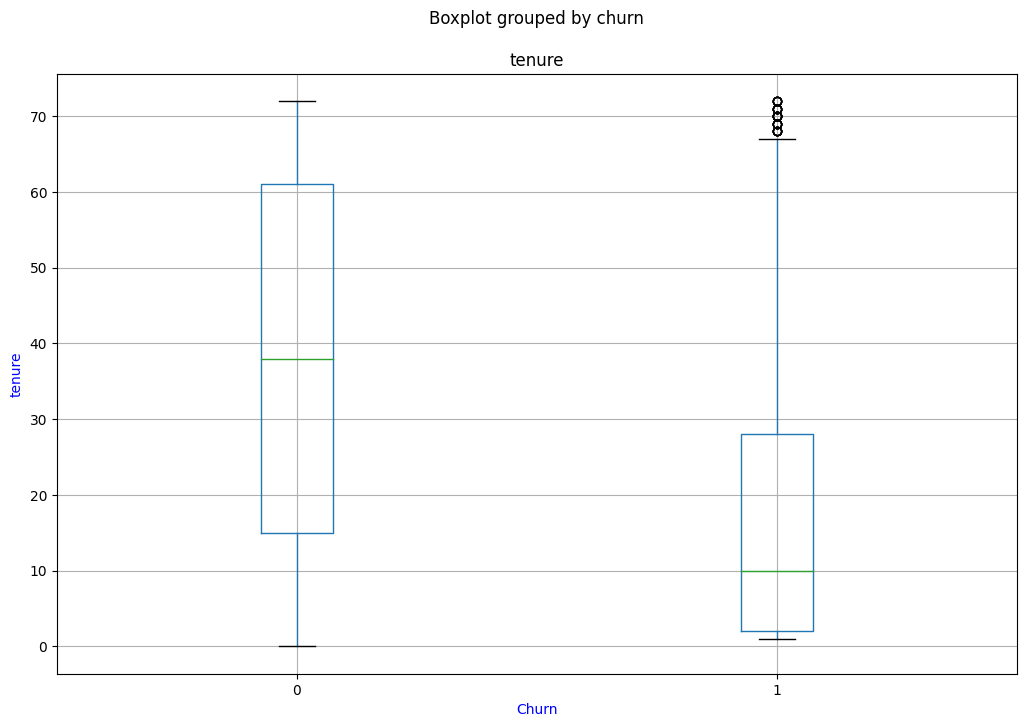

In [309]:
df_treino1.boxplot(column = 'tenure', by = 'churn', figsize = (12, 8))
plt.xlabel('Churn', fontsize = 10, color= 'blue')
plt.ylabel('tenure', fontsize = 10, color= 'blue')
plt.show()

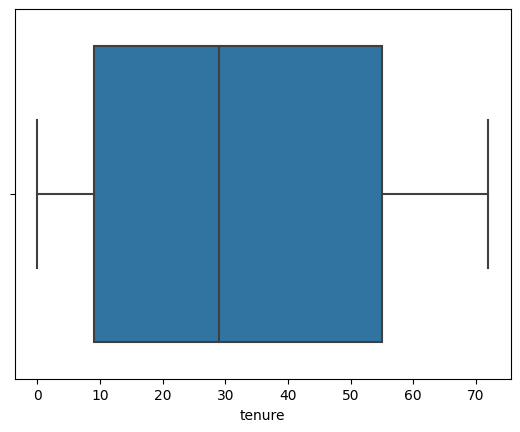

In [310]:
# Vamos ver outliers eventuais:
# Olhando no geral, não há outliers, mas quando olha-se separando por churn, parece que haveria.
sns.boxplot(df_treino1['tenure'])


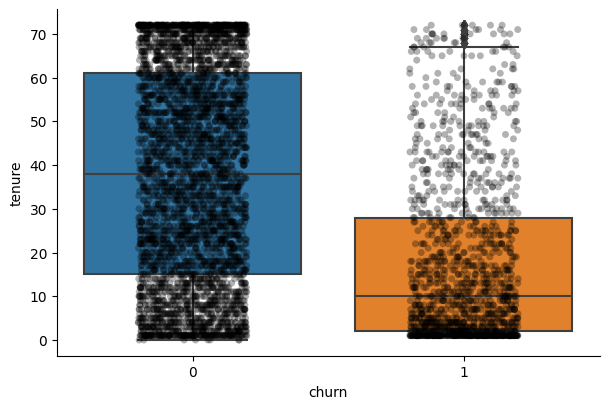

In [311]:
boxplot_churn(df_treino1, 'tenure')

In [312]:
mostra_missing_value(df_treino1)

                Total  Percentual
tenure            461         8.0
paymentmethod      99         2.0
churn               0         0.0
onlinesecurity      0         0.0
gender              0         0.0
seniorcitizen       0         0.0
partner             0         0.0
dependents          0         0.0
phoneservice        0         0.0
multiplelines       0         0.0


In [313]:
# df teste
mostra_missing_value(df_teste1)

                 Total  Percentual
tenure             118         8.0
paymentmethod       30         2.0
totalcharges         0         0.0
internetservice      0         0.0
gender               0         0.0
seniorcitizen        0         0.0
partner              0         0.0
dependents           0         0.0
phoneservice         0         0.0
multiplelines        0         0.0


### Vamos tratar os MISSING VALUES e depois verificar se há outliers e então NORMALIZAR a variável

*   Item da lista
*   Item da lista



In [314]:
df_treino1['tenure'].isnull().sum()

461

In [315]:
# df teste
df_teste1['tenure'].isnull().sum()

118

In [316]:
df_treino1['tenure'].describe()

count    5173.000000
mean       32.332882
std        24.463607
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [317]:
df_treino1['tenure'].median()

29.0

In [318]:
# Como se trata de tempo de permanência, vamos colocar a mediana nos valores missing
df_treino1['tenure'] = df_treino1['tenure'].fillna(df_treino1['tenure'].median())

In [319]:
#df teste
# Como se trata de tempo de permanência, vamos colocar a mediana nos valores missing
df_teste1['tenure'] = df_teste1['tenure'].fillna(df_teste1['tenure'].median())

In [320]:
df_teste1['tenure'].isnull().sum()

0

In [321]:
# df_treino
df_treino2 = df_treino1.copy()

In [322]:
#df teste
df_teste2 = df_teste1.copy()

In [323]:
# Cálculo dos Quartis:
q1_tenure, q3_tenure = df_treino2['tenure'].quantile([0.25,0.75]).to_list()
iqr_tenure = q3_tenure - q1_tenure
print('q1 = ',q1_tenure, '\n'
      'q3 = ', q3_tenure)
print('iqr tenure = ',iqr_tenure)
print('mínimo tenure: ', df_treino2['tenure'].min())
print('maximo tenure: ', df_treino2['tenure'].max())

q1 =  10.0 
q3 =  53.0
iqr tenure =  43.0
mínimo tenure:  0.0
maximo tenure:  72.0


In [324]:
# Verificando os outliers
outlier_tenure_inferior = q1_tenure - 1.5 * iqr_tenure
outlier_tenure_superior = q3_tenure + 1.5 * iqr_tenure

df_outliers_tenure = df_treino2[['tenure']]

# Salários outliers inferiores
df_outliers_tenure[df_outliers_tenure['tenure'] < outlier_tenure_inferior]

,tenure


In [325]:
df_outliers_tenure[df_outliers_tenure['tenure'] > outlier_tenure_superior]

,tenure


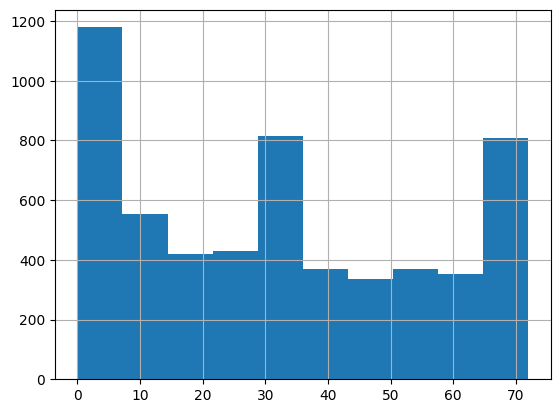

In [326]:
df_treino2['tenure'].hist()

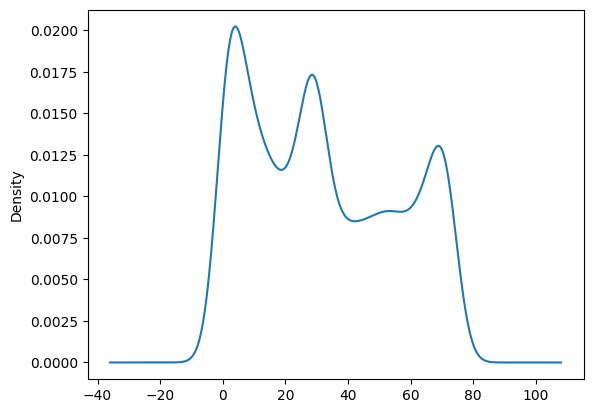

In [327]:
df_treino2['tenure'].plot(kind = 'kde')

In [328]:
df_tenure = pd.DataFrame(df_treino2['tenure'])
df_tenure.head()

                    

,tenure
0,56.0
1,29.0
2,60.0
3,37.0
4,29.0


In [329]:
df_treino2.columns

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [330]:
df_treino2.head(2)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,1,0,1,1,29.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0


##VARIÁVEL : phoneservice

In [331]:
df_treino2['phoneservice'].value_counts()

Yes    5082
No      552
Name: phoneservice, dtype: int64

In [332]:
le = LabelEncoder()
df_treino2['phoneservice_le'] = le.fit_transform(df_treino2['phoneservice'])
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,phoneservice_le
0,4030,0,0,0,0,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,1,0,1,1,29.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1
2,6479,0,0,1,0,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,1
3,6861,0,0,0,0,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,1
4,3266,1,0,1,1,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [333]:
#df teste
le = LabelEncoder()
df_teste2['phoneservice_le'] = le.fit_transform(df_teste2['phoneservice'])
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,phoneservice_le
0,5027,1,0,1,1,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1
1,1733,1,1,1,1,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1
2,5384,1,0,0,0,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,1
3,6554,0,0,1,1,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0
4,364,0,0,0,0,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,1


In [334]:
df_treino2['phoneservice'] = df_treino2['phoneservice_le']
df_treino2 = df_treino2.drop(columns = 'phoneservice_le', axis = 1)
df_treino2.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,1,0,1,1,29.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,0,0,0,0,37.0,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [335]:
#df teste
df_teste2['phoneservice'] = df_teste2['phoneservice_le']
df_teste2 = df_teste2.drop(columns = 'phoneservice_le', axis = 1)
df_teste2.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,1,1,1,1,61.0,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,1,0,0,0,36.0,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,0,0,1,1,61.0,0,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,0,0,0,0,47.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


# Variável: multiplelines

In [336]:
df_treino2['multiplelines'].value_counts()

No                  2692
Yes                 2390
No phone service     552
Name: multiplelines, dtype: int64

In [337]:
le = LabelEncoder()
df_treino2['multiplelines_le'] = le.fit_transform(df_treino2['multiplelines'])
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,multiplelines_le
0,4030,0,0,0,0,56.0,0,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,1
1,6731,1,0,1,1,29.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,0
2,6479,0,0,1,0,60.0,1,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,2
3,6861,0,0,0,0,37.0,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,2
4,3266,1,0,1,1,29.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,0


In [338]:
#df teste
le = LabelEncoder()
df_teste2['multiplelines_le'] = le.fit_transform(df_teste2['multiplelines'])
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,multiplelines_le
0,5027,1,0,1,1,23.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,0
1,1733,1,1,1,1,61.0,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,2
2,5384,1,0,0,0,36.0,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,2
3,6554,0,0,1,1,61.0,0,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,1
4,364,0,0,0,0,47.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0


In [339]:
df_treino2['multiplelines'] = df_treino2['multiplelines_le']
df_treino2.drop(columns = 'multiplelines_le', axis=1, inplace=True)
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,1,0,1,1,29.0,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,0,0,0,0,37.0,1,2,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [340]:
#df teste
df_teste2['multiplelines'] = df_teste2['multiplelines_le']
df_teste2.drop(columns = 'multiplelines_le', axis=1, inplace=True)
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,1,1,1,1,61.0,1,2,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,1,0,0,0,36.0,1,2,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,0,0,1,1,61.0,0,1,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,0,0,0,0,47.0,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [341]:
df_treino2.columns

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [342]:
#df teste
df_teste2.columns

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'],
      dtype='object')

In [343]:
df_treino2['internetservice'].value_counts()

Fiber optic    2451
DSL            1959
No             1224
Name: internetservice, dtype: int64

In [344]:
#df teste
df_teste2['internetservice'].value_counts()

Fiber optic    645
DSL            462
No             302
Name: internetservice, dtype: int64

#Todas ad demais variáveis categóricas:

'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'


In [345]:
le = LabelEncoder()
df_treino2['internetservice_le'] = le.fit_transform(df_treino2['internetservice'])
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,internetservice_le
0,4030,0,0,0,0,56.0,0,1,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,1,0,1,1,29.0,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,2
2,6479,0,0,1,0,60.0,1,2,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,1
3,6861,0,0,0,0,37.0,1,2,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,1
4,3266,1,0,1,1,29.0,1,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [351]:
#df teste
le = LabelEncoder()
df_teste2['internetservice_le'] = le.fit_transform(df_teste2['internetservice'])
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,internetservice_le
0,5027,1,0,1,1,23.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,2
1,1733,1,1,1,1,61.0,1,2,1,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1
2,5384,1,0,0,0,36.0,1,2,1,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,1
3,6554,0,0,1,1,61.0,0,1,0,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0
4,364,0,0,0,0,47.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,2


In [352]:
df_treino2['internetservice'] = df_treino2['internetservice_le']
df_treino2.drop(columns = 'internetservice_le', axis = 1, inplace = True)

KeyError: ignored

In [353]:
#df teste
df_teste2['internetservice'] = df_teste2['internetservice_le']
df_teste2.drop(columns = 'internetservice_le', axis = 1, inplace = True)

In [354]:
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,1,1,1,1,61.0,1,2,1,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,1,0,0,0,36.0,1,2,1,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,0,0,1,1,61.0,0,1,0,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,0,0,0,0,47.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [355]:
df_treino2['paymentmethod'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: paymentmethod, dtype: int64

In [356]:
#df teste
df_teste2['paymentmethod'].value_counts()

Electronic check             430
Credit card (automatic)      329
Mailed check                 313
Bank transfer (automatic)    307
Name: paymentmethod, dtype: int64

In [357]:
df_treino2['paymentmethod'].isnull().sum()

99

In [358]:
#df teste
df_teste2['paymentmethod'].isnull().sum()

30

In [359]:
df_treino2['paymentmethod'].describe()

count                 5535
unique                   4
top       Electronic check
freq                  1887
Name: paymentmethod, dtype: object

In [360]:
#df teste
df_teste2['paymentmethod'].describe()

count                 1379
unique                   4
top       Electronic check
freq                   430
Name: paymentmethod, dtype: object

In [361]:
df_treino2['paymentmethod'] = df_treino2['paymentmethod'].fillna('Electronic check')
df_treino2['paymentmethod'].isnull().sum()

0

In [362]:
#df teste
df_teste2['paymentmethod'] = df_teste2['paymentmethod'].fillna('Electronic check')
df_teste2['paymentmethod'].isnull().sum()

0

In [363]:
le = LabelEncoder()
df_treino2['paymentmethod_le'] = le.fit_transform(df_treino2['paymentmethod'])
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,paymentmethod_le
0,4030,0,0,0,0,56.0,0,1,0,Yes,Yes,Yes,Yes,No,No,Two year,No,Electronic check,45.05,2560.1,0,2
1,6731,1,0,1,1,29.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,3
2,6479,0,0,1,0,60.0,1,2,1,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,1
3,6861,0,0,0,0,37.0,1,2,1,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,1,0,1,1,29.0,1,0,1,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,2


In [364]:
#df teste
le = LabelEncoder()
df_teste2['paymentmethod_le'] = le.fit_transform(df_teste2['paymentmethod'])
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,paymentmethod_le
0,5027,1,0,1,1,23.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1
1,1733,1,1,1,1,61.0,1,2,1,No,Yes,No,No,Yes,Yes,One year,No,Electronic check,99.00,5969.3,2
2,5384,1,0,0,0,36.0,1,2,1,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,2
3,6554,0,0,1,1,61.0,0,1,0,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0
4,364,0,0,0,0,47.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,3


In [365]:
df_treino2['paymentmethod'] = df_treino2['paymentmethod_le']
df_treino2.drop(columns= 'paymentmethod_le', axis=1, inplace=True)
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,Yes,Yes,Yes,Yes,No,No,Two year,No,2,45.05,2560.1,0
1,6731,1,0,1,1,29.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,3,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,1,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,1,110.80,6640.7,0
3,6861,0,0,0,0,37.0,1,2,1,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,0,101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,1,No,No,No,No,No,No,Month-to-month,Yes,2,70.75,1974.8,1


In [366]:
#df teste
df_teste2['paymentmethod'] = df_teste2['paymentmethod_le']
df_teste2.drop(columns= 'paymentmethod_le', axis=1, inplace=True)
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,1,20.00,445.3
1,1733,1,1,1,1,61.0,1,2,1,No,Yes,No,No,Yes,Yes,One year,No,2,99.00,5969.3
2,5384,1,0,0,0,36.0,1,2,1,No,No,No,No,No,Yes,Month-to-month,Yes,2,84.75,3050.15
3,6554,0,0,1,1,61.0,0,1,0,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,0,61.45,3751.15
4,364,0,0,0,0,47.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,3,20.55,945.7


In [367]:
lista_features = ['onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [368]:
#df teste
lista_features = ['onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [369]:
for i in lista_features:
  le = LabelEncoder()
  df_treino2[i +'_le'] = le.fit_transform(df_treino2[i])
  df_treino2.head()


In [370]:
# df teste
for i in lista_features:
  le = LabelEncoder()
  df_teste2[i +'_le'] = le.fit_transform(df_teste2[i])
  df_teste2.head()


In [371]:
for i in lista_features:
  df_treino2[i] = df_treino2[i+'_le']
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,onlinesecurity_le,onlinebackup_le,deviceprotection_le,techsupport_le,streamingtv_le,streamingmovies_le,contract_le,paperlessbilling_le,paymentmethod_le
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.1,0,2,2,2,2,0,0,2,0,2
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0,1,1,1,1,1,1,1,0,3
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.7,0,0,2,2,2,2,2,2,1,1
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1,0,2,2,0,2,2,0,1,0
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.8,1,0,0,0,0,0,0,0,1,2


In [372]:
# df teste
for i in lista_features:
  df_teste2[i] = df_teste2[i+'_le']
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,onlinesecurity_le,onlinebackup_le,deviceprotection_le,techsupport_le,streamingtv_le,streamingmovies_le,contract_le,paperlessbilling_le,paymentmethod_le
0,5027,1,0,1,1,23.0,1,0,2,1,1,1,1,1,1,1,1,1,20.00,445.3,1,1,1,1,1,1,1,1,1
1,1733,1,1,1,1,61.0,1,2,1,0,2,0,0,2,2,1,0,2,99.00,5969.3,0,2,0,0,2,2,1,0,2
2,5384,1,0,0,0,36.0,1,2,1,0,0,0,0,0,2,0,1,2,84.75,3050.15,0,0,0,0,0,2,0,1,2
3,6554,0,0,1,1,61.0,0,1,0,0,2,2,2,2,2,2,1,0,61.45,3751.15,0,2,2,2,2,2,2,1,0
4,364,0,0,0,0,47.0,1,0,2,1,1,1,1,1,1,2,1,3,20.55,945.7,1,1,1,1,1,1,2,1,3


In [373]:
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,onlinesecurity_le,onlinebackup_le,deviceprotection_le,techsupport_le,streamingtv_le,streamingmovies_le,contract_le,paperlessbilling_le,paymentmethod_le
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.1,0,2,2,2,2,0,0,2,0,2
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0,1,1,1,1,1,1,1,0,3
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.7,0,0,2,2,2,2,2,2,1,1
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1,0,2,2,0,2,2,0,1,0
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.8,1,0,0,0,0,0,0,0,1,2


In [374]:
df_treino2.columns


Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'onlinesecurity_le',
       'onlinebackup_le', 'deviceprotection_le', 'techsupport_le',
       'streamingtv_le', 'streamingmovies_le', 'contract_le',
       'paperlessbilling_le', 'paymentmethod_le'],
      dtype='object')

In [375]:
df_treino2.drop(columns = ['onlinesecurity_le','onlinebackup_le', 'deviceprotection_le', 'techsupport_le','streamingtv_le', 'streamingmovies_le', 'contract_le',
       'paperlessbilling_le', 'paymentmethod_le'], axis = 1, inplace = True)
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.1,0
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.7,0
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.8,1


In [376]:
#df teste
df_teste2.drop(columns = ['onlinesecurity_le','onlinebackup_le', 'deviceprotection_le', 'techsupport_le','streamingtv_le', 'streamingmovies_le', 'contract_le',
       'paperlessbilling_le', 'paymentmethod_le'], axis = 1, inplace = True)
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,0,2,1,1,1,1,1,1,1,1,1,20.00,445.3
1,1733,1,1,1,1,61.0,1,2,1,0,2,0,0,2,2,1,0,2,99.00,5969.3
2,5384,1,0,0,0,36.0,1,2,1,0,0,0,0,0,2,0,1,2,84.75,3050.15
3,6554,0,0,1,1,61.0,0,1,0,0,2,2,2,2,2,2,1,0,61.45,3751.15
4,364,0,0,0,0,47.0,1,0,2,1,1,1,1,1,1,2,1,3,20.55,945.7


In [377]:
df_treino2.isnull().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [378]:
#df teste
df_teste2.isnull().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [379]:
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,0,2,1,1,1,1,1,1,1,1,1,20.00,445.3
1,1733,1,1,1,1,61.0,1,2,1,0,2,0,0,2,2,1,0,2,99.00,5969.3
2,5384,1,0,0,0,36.0,1,2,1,0,0,0,0,0,2,0,1,2,84.75,3050.15
3,6554,0,0,1,1,61.0,0,1,0,0,2,2,2,2,2,2,1,0,61.45,3751.15
4,364,0,0,0,0,47.0,1,0,2,1,1,1,1,1,1,2,1,3,20.55,945.7


In [380]:
df_teste2.isnull().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

# Vamos fazer o pycarest e ver um resultado:**negrito**

In [381]:
!!pip install pycaret

['Requirement already satisfied: pycaret in /usr/local/lib/python3.6/dist-packages (2.2)',
 'Requirement already satisfied: seaborn in /usr/local/lib/python3.6/dist-packages (from pycaret) (0.11.0)',
 'Requirement already satisfied: mlflow in /usr/local/lib/python3.6/dist-packages (from pycaret) (1.11.0)',
 'Requirement already satisfied: spacy in /usr/local/lib/python3.6/dist-packages (from pycaret) (2.2.4)',
 'Requirement already satisfied: ipywidgets in /usr/local/lib/python3.6/dist-packages (from pycaret) (7.5.1)',
 'Requirement already satisfied: catboost>=0.23.2 in /usr/local/lib/python3.6/dist-packages (from pycaret) (0.24.2)',
 'Requirement already satisfied: kmodes>=0.10.1 in /usr/local/lib/python3.6/dist-packages (from pycaret) (0.10.2)',
 'Requirement already satisfied: pandas-profiling>=2.8.0 in /usr/local/lib/python3.6/dist-packages (from pycaret) (2.9.0)',
 'Requirement already satisfied: scikit-plot in /usr/local/lib/python3.6/dist-packages (from pycaret) (0.3.7)',
 'Req

In [382]:
!pip install shap

In [386]:
df_treino2

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.1,0
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.7,0
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,1,0,0,0,43.0,0,1,0,0,0,2,2,0,2,1,0,2,44.15,1931.3,0
5630,604,1,0,0,0,29.0,1,2,1,0,2,2,2,2,2,2,0,2,108.65,4903.2,0
5631,4803,0,0,0,0,28.0,1,0,0,0,2,0,2,0,0,0,0,0,54.65,1517.5,0
5632,6317,1,0,1,1,63.0,1,2,2,1,1,1,1,1,1,2,0,3,25.25,1573.05,0


In [387]:
y = df_treino2['churn']

In [388]:
y

0       0
1       0
2       0
3       1
4       1
       ..
5629    0
5630    0
5631    0
5632    0
5633    0
Name: churn, Length: 5634, dtype: int64

In [389]:
X = df_treino2
X

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.1,0
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.7,0
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,1,0,0,0,43.0,0,1,0,0,0,2,2,0,2,1,0,2,44.15,1931.3,0
5630,604,1,0,0,0,29.0,1,2,1,0,2,2,2,2,2,2,0,2,108.65,4903.2,0
5631,4803,0,0,0,0,28.0,1,0,0,0,2,0,2,0,0,0,0,0,54.65,1517.5,0
5632,6317,1,0,1,1,63.0,1,2,2,1,1,1,1,1,1,2,0,3,25.25,1573.05,0


In [469]:
df_treino2[df_treino2['totalcharges'] == ' '] = 0
df_teste2[df_teste2['totalcharges'] == ' '] = 0

In [472]:
df_treino2['totalcharges'].iloc[161]

0.0

In [473]:
df_teste2['totalcharges'].iloc[313]

0

In [475]:
df_treino2['totalcharges'].replace(to_replace = ' ', value=0)

0       2560.10
1        332.65
2       6640.70
3       3545.35
4       1974.80
         ...   
5629    1931.30
5630    4903.20
5631    1517.50
5632    1573.05
5633    3605.60
Name: totalcharges, Length: 5634, dtype: float64

In [476]:
df_treino2['totalcharges'] = pd.to_numeric(df_treino2['totalcharges'])
df_teste2['totalcharges']=pd.to_numeric(df_teste2['totalcharges'])

In [478]:
df_treino2['totalcharges'].dtype

dtype('float64')

In [479]:
df_teste2['totalcharges'].dtype

dtype('float64')

In [481]:
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.10,0
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.70,0
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.80,1


In [482]:
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,0,2,1,1,1,1,1,1,1,1,1,20.00,445.30
1,1733,1,1,1,1,61.0,1,2,1,0,2,0,0,2,2,1,0,2,99.00,5969.30
2,5384,1,0,0,0,36.0,1,2,1,0,0,0,0,0,2,0,1,2,84.75,3050.15
3,6554,0,0,1,1,61.0,0,1,0,0,2,2,2,2,2,2,1,0,61.45,3751.15
4,364,0,0,0,0,47.0,1,0,2,1,1,1,1,1,1,2,1,3,20.55,945.70


In [531]:
from pycaret.classification import *

In [532]:
df_teste2.columns

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'],
      dtype='object')

In [533]:
clf = setup(data = df_treino2,
            target = 'churn',
            categorical_features = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'],
            numeric_imputation = 'mean', # para tratamento dos missing values
            session_id = 20111974, # Seed por questões de reproducibilidade
            silent = False)

,Description,Value
0,session_id,20111974
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5634, 21)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [534]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8126,0.8469,0.7206,0.8037,0.8049,0.4740,0.4803,3.702
ridge,Ridge Classifier,0.8100,0.0000,0.7182,0.8007,0.8023,0.4672,0.4729,0.018
lda,Linear Discriminant Analysis,0.8095,0.8447,0.7324,0.8039,0.8055,0.4826,0.4848,0.035
gbc,Gradient Boosting Classifier,0.8093,0.8506,0.7148,0.7993,0.8008,0.4621,0.4685,0.634
ada,Ada Boost Classifier,0.8085,0.8465,0.7240,0.8010,0.8027,0.4719,0.4756,0.239
lr,Logistic Regression,0.8080,0.8464,0.7211,0.7999,0.8018,0.4684,0.4724,0.382
rf,Random Forest Classifier,0.8035,0.8399,0.7012,0.7924,0.7931,0.4390,0.4478,0.717
lightgbm,Light Gradient Boosting Machine,0.8019,0.8346,0.7103,0.7924,0.7946,0.4478,0.4524,0.128
et,Extra Trees Classifier,0.7933,0.8202,0.6951,0.7829,0.7846,0.4196,0.4258,0.667
xgboost,Extreme Gradient Boosting,0.7898,0.8247,0.6969,0.7801,0.7828,0.4172,0.4210,0.922


PARAMETROS ALÇADOS PELO PYCARET

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [535]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8304,0.8498,0.7419,0.8225,0.8228,0.5221,0.5293
1,0.7899,0.8333,0.6922,0.7783,0.7815,0.4120,0.4167
2,0.8000,0.8194,0.7214,0.7937,0.7961,0.4589,0.4602
3,0.8299,0.8702,0.7364,0.8216,0.8214,0.5146,0.5233
4,0.8071,0.8416,0.6951,0.7947,0.7939,0.4355,0.4483
5,0.8477,0.8644,0.7581,0.8417,0.8397,0.5638,0.5741
6,0.7817,0.8290,0.6910,0.7728,0.7761,0.4003,0.4022
7,0.8198,0.8723,0.7264,0.8105,0.8116,0.4892,0.4961
8,0.8046,0.8477,0.7150,0.7952,0.7976,0.4578,0.4620
9,0.8147,0.8416,0.7283,0.8062,0.8081,0.4860,0.4904


In [554]:

cat_features = [0,1]

In [546]:
y

0       0
1       0
2       0
3       1
4       1
       ..
5629    0
5630    0
5631    0
5632    0
5633    0
Name: churn, Length: 5634, dtype: int64

In [568]:
from catboost import CatBoostClassifier
from catboost import Pool

In [569]:
df_treino2.head(2)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.10,0
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0


In [567]:
df_semtarget = df_treino2.drop(columns = 'churn', axis = 1)
df_semtarget.head(2)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.10
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65


In [570]:
X = Pool(data=df_semtarget, label = y, cat_features=['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'])

In [571]:
catboost.fit(X)

In [574]:
y_predict = catboost.predict(df_teste2)

In [586]:
y_predict

array([0, 0, 1, ..., 0, 1, 0])

In [577]:
df_teste2.index

RangeIndex(start=0, stop=1409, step=1)

In [584]:
predicao1 = pd.Series(y_predict)
predicao1.head()

0    0
1    0
2    1
3    0
4    0
dtype: int64

In [585]:
type(predicao1)

pandas.core.series.Series

In [587]:
predicao1.to_csv('predicao1')